In [13]:
fn = './results/ae/confusion_matrix_bubble_epoch105.csv'
# rows are predicted, columns are expected
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
conf_mat = pd.read_csv(fn,header=None)
print(conf_mat)
conf_mat = np.array(conf_mat)
# rows are predicted, columns are expected

      0     1     2     3     4     5     6     7     8      9   ...    16  \
0   30.0  35.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   0.0   
1   15.0  50.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   0.0   
2    0.0   0.0  55.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   0.0   
3    0.0   0.0   0.0  75.0   0.0   5.0  25.0   0.0   0.0    0.0  ...   5.0   
4    0.0   0.0   0.0   0.0  35.0   0.0   0.0   0.0   0.0    0.0  ...   0.0   
5    0.0   0.0   0.0   0.0   0.0  60.0  20.0   0.0   0.0    0.0  ...   5.0   
6    0.0   0.0   0.0   0.0   0.0  35.0  40.0   0.0   0.0    0.0  ...  10.0   
7    0.0   0.0   0.0   0.0   0.0   0.0   0.0  65.0   0.0    0.0  ...   0.0   
8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  15.0    0.0  ...   0.0   
9    0.0   0.0   0.0   0.0  10.0   0.0   0.0   0.0   0.0  100.0  ...   0.0   
10   0.0   0.0   0.0   0.0  50.0   0.0   0.0   0.0   0.0    0.0  ...   0.0   
11   0.0   0.0  15.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0 

In [15]:
labels = pd.read_csv('../task48c_prepare_kinship_data_ped-sim/res_s1_val_4_trees/sample_info_val.tsv',sep='\t')
labels.head()
# convert to categorical
labels['Population'] = labels['Population'].astype('category')
categories = labels['Population'].cat.categories
[(i, j) for i,j in enumerate(categories)]

[(0, 'ACB'),
 (1, 'ASW'),
 (2, 'BEB'),
 (3, 'CDX'),
 (4, 'CEU'),
 (5, 'CHB'),
 (6, 'CHS'),
 (7, 'CLM'),
 (8, 'ESN'),
 (9, 'FIN'),
 (10, 'GBR'),
 (11, 'GIH'),
 (12, 'GWD'),
 (13, 'IBS'),
 (14, 'ITU'),
 (15, 'JPT'),
 (16, 'KHV'),
 (17, 'LWK'),
 (18, 'MSL'),
 (19, 'MXL'),
 (20, 'PEL'),
 (21, 'PJL'),
 (22, 'PUR'),
 (23, 'STU'),
 (24, 'TSI'),
 (25, 'YRI')]

In [16]:
# remove and merge categories

# remove 'ACB', 'ASW', 'GIH', 'ITU', 'MXL', 'STU'
conf_mat = np.delete(conf_mat, [0, 1, 11, 14, 19, 23], axis=0)
conf_mat = np.delete(conf_mat, [0, 1, 11, 14, 19, 23], axis=1)
categories = np.delete(categories, [0, 1, 11, 14, 19, 23])
[(i, j) for i,j in enumerate(categories)]

[(0, 'BEB'),
 (1, 'CDX'),
 (2, 'CEU'),
 (3, 'CHB'),
 (4, 'CHS'),
 (5, 'CLM'),
 (6, 'ESN'),
 (7, 'FIN'),
 (8, 'GBR'),
 (9, 'GWD'),
 (10, 'IBS'),
 (11, 'JPT'),
 (12, 'KHV'),
 (13, 'LWK'),
 (14, 'MSL'),
 (15, 'PEL'),
 (16, 'PJL'),
 (17, 'PUR'),
 (18, 'TSI'),
 (19, 'YRI')]

In [17]:
# # merge 'GBR' and 'CEU'
conf_mat[:, 2] = conf_mat[:, 2] /2 + conf_mat[:, 8] /2
conf_mat[2,:] = conf_mat[2,:] + conf_mat[8,:]
# remove GBR
conf_mat = np.delete(conf_mat, 8, axis=1)
conf_mat = np.delete(conf_mat, 8, axis=0)
# update categories
categories = np.delete(categories, 8)
[print(i, j) for i,j in enumerate(categories)]

labels = list(categories)
labels[2] = 'CEU+GBR'
print(labels)

0 BEB
1 CDX
2 CEU
3 CHB
4 CHS
5 CLM
6 ESN
7 FIN
8 GWD
9 IBS
10 JPT
11 KHV
12 LWK
13 MSL
14 PEL
15 PJL
16 PUR
17 TSI
18 YRI
['BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']


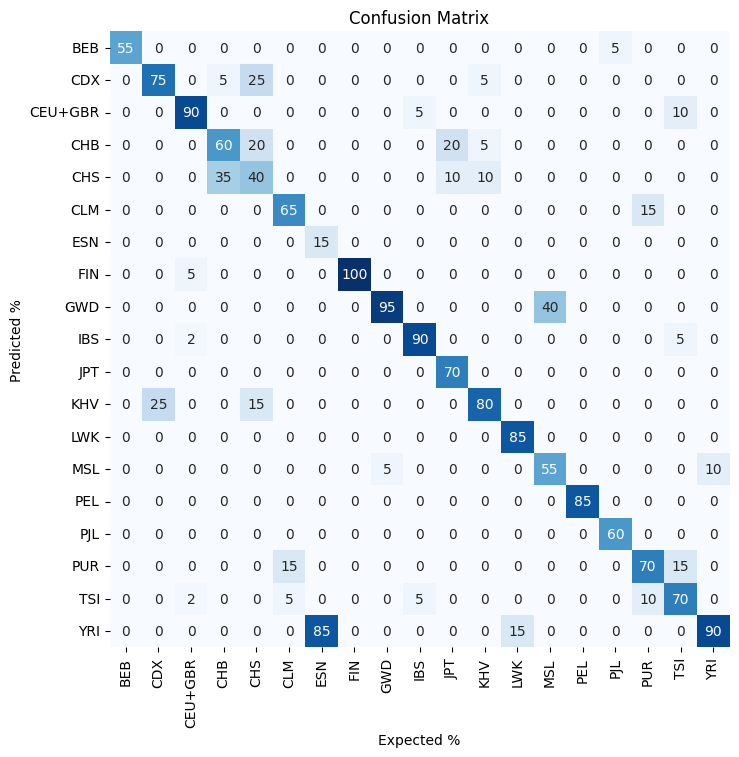

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Expected %')
plt.ylabel('Predicted %')
plt.show()